In [1]:
import numpy as np
import pandas as pd
import matplotlib as pltlib
import seaborn as sns


# Exploración inicial de datos
| Variable     | Definition                                      | Key                                                                 |
|--------------|--------------------------------------------------|----------------------------------------------------------------------|
| survival     | Survival                                         | 0 = No, 1 = Yes                                                     |
| pclass       | Ticket class                                     | 1 = 1st, 2 = 2nd, 3 = 3rd                                           |
| sex          | Sex                                              |                                                                     |
| age          | Age in years                                     | Age is fractional if less than 1. If estimated, in form of xx.5     |
| sibsp        | # of siblings / spouses aboard the Titanic       | Sibling: brother, sister, stepbrother, stepsister<br>Spouse: husband, wife (mistresses and fiancés ignored) |
| parch        | # of parents / children aboard the Titanic       | Parent: mother, father<br>Child: daughter, son, stepdaughter, stepson<br>Some children travelled only with a nanny, so parch=0 for them |
| ticket       | Ticket number                                    |                                                                     |
| fare         | Passenger fare                                   |                                                                     |
| cabin        | Cabin number                                     |                                                                     |
| embarked     | Port of Embarkation                              | C = Cherbourg, Q = Queenstown, S = Southampton                      |

**Variable Notes:**

- **pclass**: A proxy for socio-economic status (SES)<br>1st = Upper, 2nd = Middle, 3rd = Lower
- **age**: Age is fractional if less than 1. If estimated, is in the form of xx.5
- **sibsp**: The dataset defines family relations as follows...<br>Sibling = brother, sister, stepbrother, stepsister<br>Spouse = husband, wife (mistresses and fiancés were ignored)
- **parch**: The dataset defines family relations as follows...<br>Parent = mother, father<br>Child = daughter, son, stepdaughter, stepson<br>Some children travelled only with a nanny, therefore parch=0 for them

In [12]:
data_frame_train=pd.read_csv('titanic/train.csv')
data_frame_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [18]:
data_frame_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
data_frame_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
data_frame_train.value_counts()

PassengerId  Survived  Pclass  Name                                                 Sex     Age   SibSp  Parch  Ticket    Fare     Cabin        Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0  1      0      PC 17599  71.2833  C85          C           1
4            1         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)         female  35.0  1      0      113803    53.1000  C123         S           1
7            0         1       McCarthy, Mr. Timothy J                              male    54.0  0      0      17463     51.8625  E46          S           1
11           1         3       Sandstrom, Miss. Marguerite Rut                      female  4.0   1      1      PP 9549   16.7000  G6           S           1
12           1         1       Bonnell, Miss. Elizabeth                             female  58.0  0      0      113783    26.5500  C103         S           1
                                                         

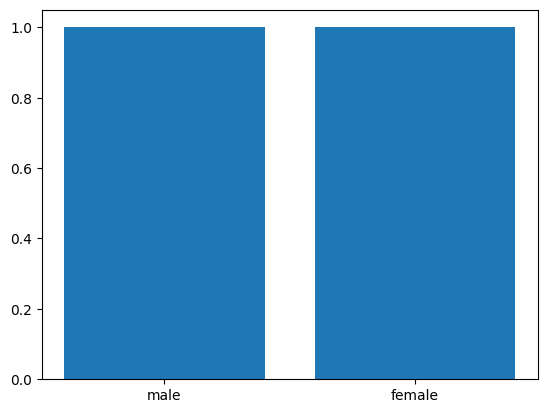

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar( data_frame_train['Sex'],data_frame_train['Survived'])
plt.show()

In [13]:
data_frame_gender=pd.read_csv('titanic/gender_submission.csv')
data_frame_gender.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
